In [1]:
{-# LANGUAGE FlexibleContexts, GADTs, TypeOperators #-}
import Data.Manifold.TreeCover
import Data.Manifold.Web
import Data.Manifold.Types
import Data.VectorSpace
import Data.AffineSpace
import Data.LinearMap.HerMetric
import Data.Random
import Data.Random.Manifold

import Control.Arrow ((***))
import Control.Applicative (empty)
import Data.Foldable (toList, forM_)
import Data.Traversable (forM)

From [dynamic-plot](http://hackage.haskell.org/packages/dynamic-plot):

In [2]:
import Graphics.Dynamic.Plot.R2

From [diagrams](http://projects.haskell.org/diagrams):

In [3]:
import Diagrams.Prelude ( p2, circle, (&), (^.), _1, moveTo, opacity, fromVertices )

Functions for plotting a 2D tree/web structures. Trees with lines for twigs and circles for leaves.

In [4]:
prettyTreePlot :: ShadeTree ℝ² -> [DynamicPlottable]
prettyTreePlot tr = [ plot [ shapePlot $ circle 0.06 & moveTo p & opacity 0.2 | p <- ps ]
                    , plot $ onlyNodes tr ]
 where ps = map p2 $ onlyLeaves tr
 
prettyWebPlot :: PointsWeb ℝ² () -> [DynamicPlottable]
prettyWebPlot w = [ shapePlot $ fromVertices [p2 r₁, p2 r₂] | ((r₁,()),(r₂,())) <- edg ]
 where edg = webEdges w

defMetric :: HerMetric ℝ²
defMetric = euclideanMetric'

plotTreeAndWeb :: ShadeTree ℝ² -> IO ()
plotTreeAndWeb tr = do
    plotWindow $ prettyTreePlot tr
    plotWindow $ dynamicAxes : prettyWebPlot (fromShadeTree (const defMetric) tr)
    return ()

Simple cartesian grid within a disk:

In [5]:
cartTree :: ShadeTree ℝ²
cartTree = fromLeafPoints
               [ (x,y) | x<-[0, 0.15 .. 4]
                       , y<-[0, 0.2 .. 4]
                       , (x-2)^2 + (y-2)^2 < 4 ]

plotTreeAndWeb cartTree

![visualisation of tree-cover of cartesian-disk cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/cartesiandisk-2d-ShadeTree.png)
![visualisation of points-web of cartesian-disk cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/cartesiandisk-2d-PointsWeb.png)

<a id='pseudorandomCloudTree'></a>Cloud of 405 sort-of random points:

In [6]:
let tps₀ = [(0,0), (0,1), (1,1), (1,2), (2,2)]
    tps₁ = [p .+^ v^/3 | p<-tps₀, v <- [(0,0), (-1,1), (1,2)]]
    tps₂ = [p .+^ v^/4 | p<-tps₁, v <- [(0,0), (-1,1), (1,2)]]
    tps₃ = [p .+^ v^/5 | p<-tps₂, v <- [(0,0), (-2,1), (1,2)]]
    tps₄ = [p .+^ v^/7 | p<-tps₃, v <- [(0,1), (-1,1), (1,2)]]
 in plotTreeAndWeb $ fromLeafPoints tps₄

![visualisation of tree-cover of pseudorandom-point cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/simple-2d-ShadeTree.png)
![visualisation of points-web of pseudorandom-point cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/simple-2d-PointsWeb.png)

1000 actually-random, normally-distributed points<!--, with focus on one local point-group and its neighbours-->:

In [7]:
randomTr <- fmap fromLeafPoints . forM [0..1000] $ \_->
     runRVar (sample $ (1,1):±[(1,0),(0,1)]) StdRandom :: IO ℝ²

-- ((_,twig),envi) <- runRVar (randomElement $ twigsWithEnvirons randomTr) StdRandom
-- plotWindow $ prettyTreePlot randomTr
--          ++ prettyTreePlot twig
--          ++ [plot $ prettyTreePlot.snd<$>envi]

plotTreeAndWeb randomTr

![visualisation of tree-cover of pseudorandom-point cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/normaldistrib-2d-ShadeTree.png)
![visualisation of points-web of pseudorandom-point cloud](https://raw.githubusercontent.com/leftaroundabout/manifolds/master/manifolds/images/examples/normaldistrib-2d-PointsWeb.png)

In [4]:
import Data.Graph
import Data.Graph.Inductive.PatriciaTree (Gr)
import Diagrams.TwoD.GraphViz
import Data.GraphViz

import Diagrams.Prelude ( p2, circle, (&), (^.), _1, moveTo, scale, opacity, fromVertices
                        , with, gaps, (.~), arrowShaft, unLoc, pathTrails
                        , place, arrowBetween', headLength, lc, grey )

convertGraph :: Graph -> Gr Int ()
convertGraph g = mkGraph (vertices g) [(v₁,v₂,()) | (v₁,v₂)<-edges g]

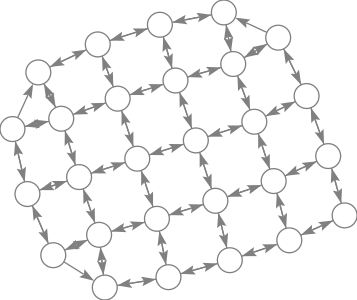

In [17]:
smallCartTree :: ShadeTree ℝ²
smallCartTree = fromLeafPoints
               [ (x,y) | x<-[0, 0.7 .. 4]
                       , y<-[0, 0.6 .. 4]
                       , (x-2)^2 + (y-2)^2 < 4 ]
smallRandomTr <- fmap fromLeafPoints . forM [0..30] $ \_->
     runRVar (sample $ (1,1):±[(1,0),(0,1)]) StdRandom :: IO ℝ²

-- plotTreeAndWeb smallCartTree

gr <- layoutGraph Neato . convertGraph
           $ toGraph (fromShadeTree (const defMetric) smallRandomTr) ^. _1
opts p = with & gaps .~ 10 & arrowShaft .~ (unLoc . head $ pathTrails p)
                           & headLength .~ 6
-- drawGraph (const $ place (circle 19))
--           (\_ p1 _ p2 _ p -> arrowBetween' (opts p) p1 p2)
--           gr
--         & lc grey

webGraph <- simpleGraphDiagram Neato . convertGraph
                    $ toGraph (fromShadeTree (const defMetric) smallCartTree) ^. _1
                :: IO PlainGraphicsR2
webGraph & lc grey

In [6]:
:i euclideanMetric'